# MNIST Project

This project was completed as a part of the Complete Machine Learning Course from Udemy.

In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on 28 x 28 pixel images.

MNIST database of handwritten digits as a training set of 60,000 examples, and a test set of 10,000 examples of small images of digits handwritten. The digits have been size-normalized and centered in a fixed-size image. You can read more via [The MNIST Database](http://yann.lecun.com/exdb/mnist/).

***

## Downloading the MNIST dataset

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from sklearn.datasets.base import get_data_home
from sklearn.datasets import fetch_mldata
from six.moves import urllib
from shutil import copyfileobj
import os

In [4]:
def fetch_mnist(data_home=None):
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    data_home = get_data_home(data_home=data_home)
    data_home = os.path.join(data_home, 'mldata')
    if not os.path.exists(data_home):
        os.makedirs(data_home)
    mnist_save_path = os.path.join(data_home, "mnist-original.mat")
    if not os.path.exists(mnist_save_path):
        mnist_url = urllib.request.urlopen(mnist_alternative_url)
        with open(mnist_save_path, "wb") as matlab_file:
            copyfileobj(mnist_url, matlab_file)

In [5]:
fetch_mnist()
mnist = fetch_mldata('MNIST original')
mnist

C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [6]:
len(mnist['data'])

70000

# Visualisation

In [7]:
X, y = mnist['data'], mnist['target']

In [8]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
y

array([0., 0., 0., ..., 9., 9., 9.])

In [10]:
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

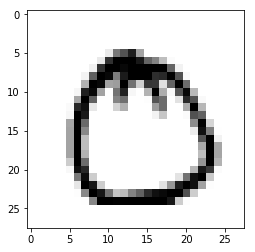

In [12]:
_ = X[1000]
_image = _.reshape(28, 28)
plt.imshow(_image, cmap='gray_r');

In [13]:
y[1000]

0.0

### Locating the number 4 and plot the image

In [14]:
type(y)

numpy.ndarray

In [15]:
np.where(y==4)

(array([24754, 24755, 24756, ..., 65136, 65137, 65138], dtype=int64),)

In [16]:
y[24754]

4.0

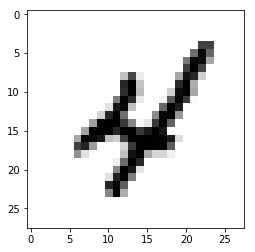

In [17]:
_ = X[24755]
_image = _.reshape(28, 28)
plt.imshow(_image, cmap='gray_r');

***

# Splitting the train and test sets
* Get the first 60000 entries for the training set
* Split the remaining data and keep 10000 entries for the test


In [18]:
num_split = 60000
X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

Typically we shuffle the training set. This ensures that the training set is randomised and our data distribution is consistent. However, shuffling is a bad idea for time series data.

# Shuffling the dataset

[Alternative Method](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) (ShuffleSplit from sklearn.model_selection)

In [19]:
import numpy as np

In [20]:
shuffle_index = np.random.permutation(num_split)
len(shuffle_index)

60000

In [21]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a Binary Classifier

To simplify our problem, we will make this an exercise of "zero", True, or "non-zero", False, making it a two-class problem.

So, we need to first convert our target set to 0 or non zero.

In [22]:
y_train_0 = (y_train == 0)

In [23]:
y_train_0

array([False, False, False, ..., False, False, False])

In [24]:
y_test_0 = (y_test == 0)

In [25]:
y_test_0

array([ True,  True,  True, ..., False, False, False])

At this point we can pick any classifier and train using our data labeled to 0 or not. Now we are at the iterative part of choosing and testing all the classifiers and tuning the hyper parameters, to finally select the one that returns the best results.

***

# SGDClassifier

For this problem we'll use the SGD Classifier, avaliable on scikit-learn library. According to the documentation this estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). For best results using the default learning rate schedule, the data should have zero mean and unit variance.

It's important to notice that our classifier are using the default parameters including the _loss_, that defaults to _hinge_, which gives a linear SVM. 

# Training

In [26]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

# Prediction

In [27]:
clf.predict(X[1000].reshape(1, -1))

array([ True])

From the early visualization section, we confirm that the 1000th sample is a zero, but the classifier predicted as a non-zero. By that we see that our model make mistakes but we need to really measure how bad, or good, he is. These measures will signal us if we need to tune our hyper-parameters or maybe implement another model.    
***

# Performance Measures

# Measuring Accuracy Using Cross-Validation

## StratifiedKFold

Let's try with the `StratifiedKFold` stratified sampling to create multiple folds. At each iteration, the classifier was cloned and trained using the training folds and makes predictions on the test fold. 

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state=0)

In [29]:
skfolds = StratifiedKFold(n_splits=3, random_state=100)

In [30]:
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train[train_index]
    y_train_folds = (y_train_0[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_fold, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct / len(y_pred)))

C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9886


C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9875


C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9897


#### `cross_val_score` using K-fold Cross-Validation

K-fold cross-validation splits the training set into K-folds and then make predictions and evaluate them on each fold using a model trained on the remaning folds.

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
cross_val_score(clf, X_test, y_test_0, cv=3, scoring='accuracy')

C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

array([0.97720456, 0.91811638, 0.96518607])

## Danger of Blindly Applying Evaluator As a Performance Measure

Let's check against a dumb classifier

In [33]:
1 - sum(y_train_0) / len(y_train_0)

0.9012833333333333

A simple check shows that 90.1% of the images are not zero. Any time you guess the image is not zero, you will be right 90.13% of the time. 

Bare this in mind when you are dealing with **skewed datasets**. Because of this, accuracy is generally not the preferred performance measure for classifiers.

# Confusion Matrix

In [34]:
from sklearn.model_selection import cross_val_predict

In [35]:
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv=3)

C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

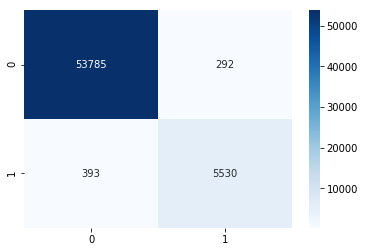

In [37]:
sns.heatmap(confusion_matrix(y_train_0, y_train_pred), annot = True, fmt='g', cmap='Blues')

Each row: actual class

Each column: predicted class

First row: Non-zero images, the negative class:
* 53785 were correctly classified as non-zeros. **True negatives**. 
* Remaining 292 were wrongly classified as 0s. **False positive**


Second row: The images of zeros, the positive class:
* 393 were incorrectly classified as 0s. **False negatives**
* 5530 were correctly classified as 0s. **True positives**


# Precision

**Precision** measures the accuracy of positive predictions. Also called the `precision` of the classifier

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

In [38]:
from sklearn.metrics import precision_score, recall_score

In [39]:
precision_score(y_train_0, y_train_pred)

0.9498454139470972

## Recall

`Precision` is typically used with `recall` (`Sensitivity` or `True Positive Rate`). The ratio of positive instances that are correctly detected by the classifier.

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$

In [40]:
recall_score(y_train_0, y_train_pred)

0.9336484889414148

## F1 Score

$F_1$ score is the harmonic mean of precision and recall. Regular mean gives equal weight to all values. Harmonic mean gives more weight to low values.


$$F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}=2\times \frac{\textrm{precision}\times \textrm{recall}}{\textrm{precision}+ \textrm{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$

The $F_1$ score favours classifiers that have similar precision and recall.


In [41]:
from sklearn.metrics import f1_score

In [42]:
f1_score(y_train_0, y_train_pred)

0.9416773094934014

# Precision / Recall Tradeoff

Increasing precision reduced recall and vice versa

Our classifier is designed to pick up zeros.

12 observations

***

**Central Arrow**

Suppose the decision threshold is positioned at the central arrow: 
* We get 4 true positives (We have 4 zeros to the right of the central arrow)
* 1 false positive which is actually seven.

At this threshold, the **precision accuracy** is $\frac{4}{5}=80\%$

However, out of the 6 zeros, the classifier only picked up 4. The **recall accuracy** is $\frac{4}{6}=67\%$

***

**Right Arrow**

* We get 3 true positives
* 0 false positive

At this threshold, the **precision accuracy** is $\frac{3}{3}=100\%$
However, out of the 6 zeros, the classifier only picked up 3. The **recall accuracy** is $\frac{3}{6}=50\%$

***

**Left Arrow**

* We get 6 true positives
* 2 false positive

At this threshold, the **precision accuracy** is $\frac{6}{8}=75\%$
Out of the 6 zeros, the classifier picked up all 6. The **recall accuracy** is $\frac{6}{6}=100\%$

***




In [43]:
clf = SGDClassifier(random_state=0)
clf.fit(X_train, y_train_0)

C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
y[1000]

0.0

In [45]:
y_scores = clf.decision_function(X[1000].reshape(1, -1))
y_scores

array([2133.34646445])

In [46]:
threshold = 0

In [47]:
y_some_digits_pred = (y_scores > threshold)

In [48]:
y_some_digits_pred

array([ True])

In [49]:
threshold = 40000
y_some_digits_pred = (y_scores > threshold)
y_some_digits_pred

array([False])

In [50]:
y_scores = cross_val_predict(clf, X_train, y_train_0, cv=3, method='decision_function')

C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left un

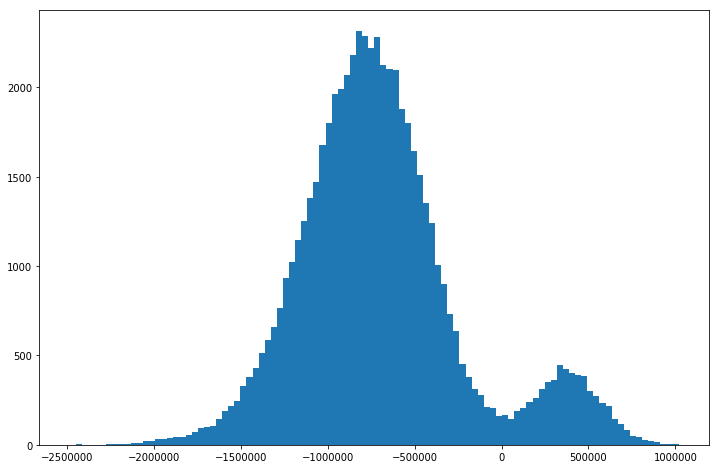

In [51]:
plt.figure(figsize=(12,8)); plt.hist(y_scores, bins=100);

With the decision scores, we can compute precision and recall for all possible thresholds using the `precision_recall_curve()` function:

In [52]:
from sklearn.metrics import precision_recall_curve

In [53]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

In [54]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-0.5,1.5])    

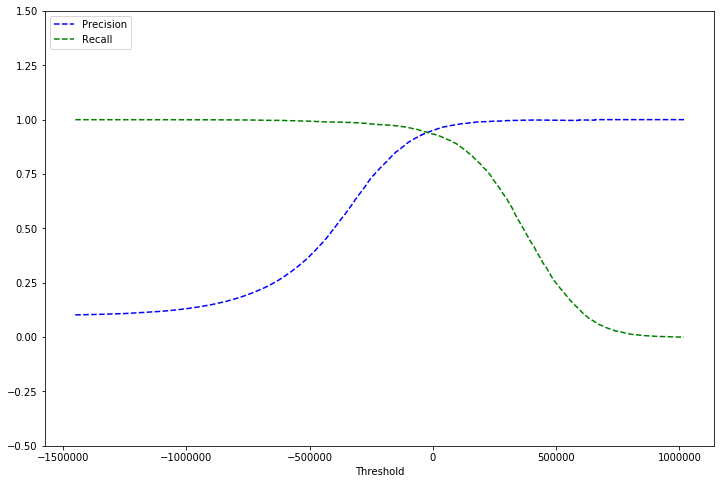

In [55]:
plt.figure(figsize=(12,8)); 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

With this chart, you can select the threshold value that gives you the best precision/recall tradeoff for your task.

Some tasks may call for higher precision (accuracy of positive predictions). Like designing a classifier that picks up adult contents to protect kids. This will require the classifier to set a high bar to allow any contents to be consumed by children.

Some tasks may call for higher recall (ratio of positive instances that are correctly detected by the classifier). Such as detecting shoplifters/intruders on surveillance images - Anything that remotely resemble "positive" instances to be picked up.

***

One can also plot precisions against recalls to assist with the threshold selection

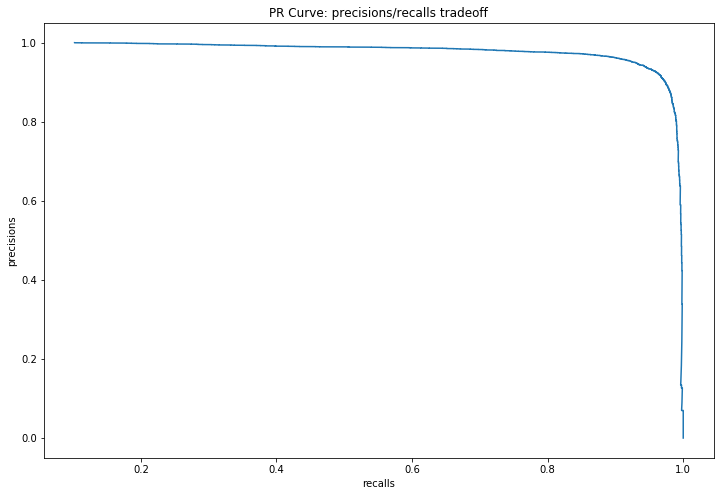

In [56]:
plt.figure(figsize=(12,8)); 
plt.plot(precisions, recalls);
plt.xlabel('recalls');
plt.ylabel('precisions');
plt.title('PR Curve: precisions/recalls tradeoff');

# Setting High Precisions

Let's aim for 90% precisions.

In [57]:
len(precisions)

58004

In [58]:
len(thresholds)

58003

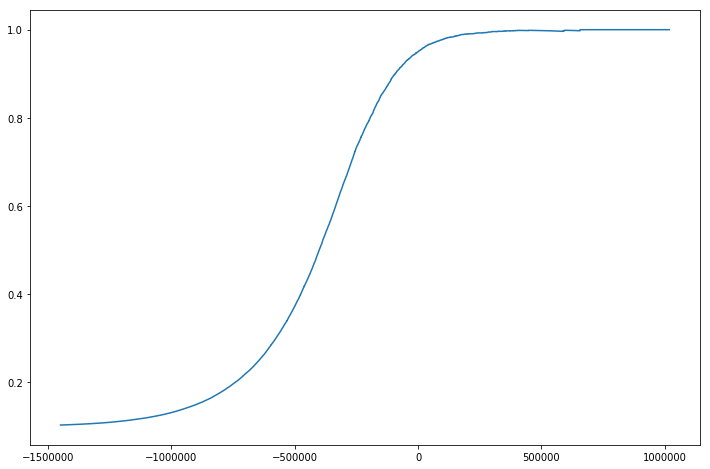

In [59]:
plt.figure(figsize=(12,8)); 
plt.plot(thresholds, precisions[1:]);

In [60]:
idx = len(precisions[precisions < 0.9])

In [61]:
thresholds[idx]

-92513.60092673636

In [62]:
y_train_pred_90 = (y_scores > 21454)

In [63]:
precision_score(y_train_0, y_train_pred_90)

0.9588060743585268

In [64]:
recall_score(y_train_0, y_train_pred_90)

0.9274016545669425

# Setting High Precisions

Let's aim for 99% precisions.

In [65]:
idx = len(precisions[precisions < 0.99])

In [66]:
thresholds[idx]

194808.42555100188

In [67]:
y_train_pred_90 = (y_scores > thresholds[idx])

In [68]:
precision_score(y_train_0, y_train_pred_90)

0.9901052631578947

In [69]:
recall_score(y_train_0, y_train_pred_90)

0.7940232990038831

***

## The Receiver Operating Characteristics (ROC) Curve

Instead of plotting precision versus recall, the ROC curve plots the `true positive rate` (another name for recall) against the `false positive rate`. The `false positive rate` (FPR) is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the `true negative rate`, which is the ratio of negative instances that are correctly classified as negative.

The TNR is also called `specificity`. Hence the ROC curve plots `sensitivity` (recall) versus `1 - specificity`.

In [70]:
from sklearn.metrics import roc_curve

In [71]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

In [72]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

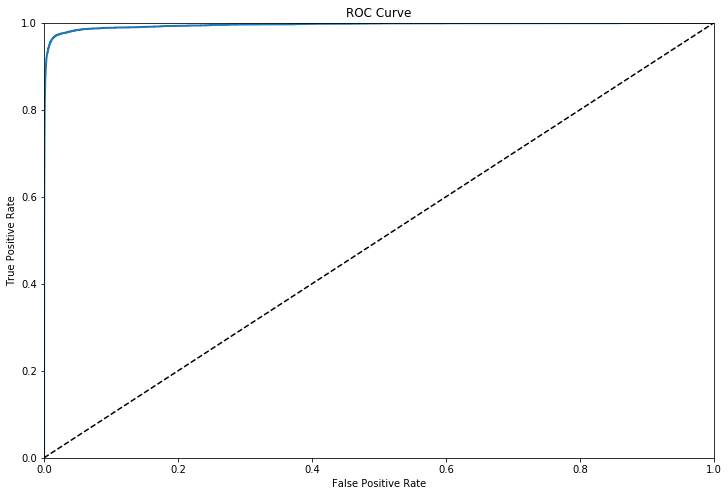

In [73]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [74]:
from sklearn.metrics import roc_auc_score

In [75]:
roc_auc_score(y_train_0, y_scores)

0.9951301767284136

Use PR curve whenever the **positive class is rare** or when you care more about the false positives than the false negatives

Use ROC curve whenever the **negative class is rare** or when you care more about the false negatives than the false positives


In the example above, the ROC curve seemed to suggest that the classifier is good. However, when you look at the PR curve, you can see that there are room for improvement.

# Model Comparison

# Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
f_clf = RandomForestClassifier(random_state=0)

In [78]:
y_probas_forest = cross_val_predict(f_clf, X_train, y_train_0,
                                   cv=3, method='predict_proba')

C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [79]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_0, y_scores_forest)

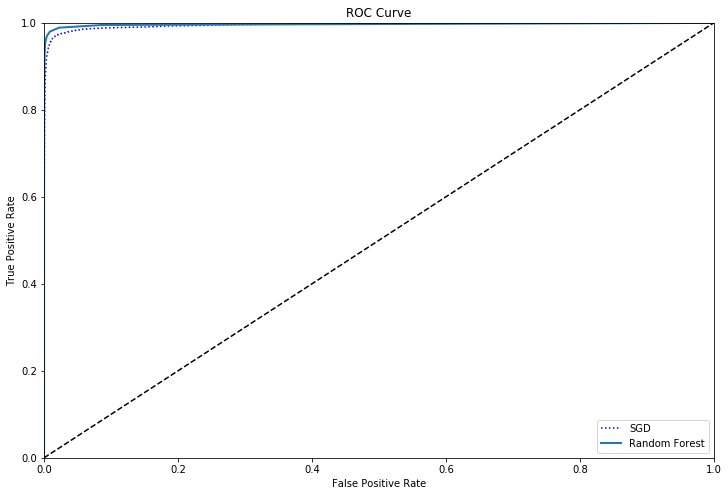

In [80]:
plt.figure(figsize=(12,8)); 
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show();

In [81]:
roc_auc_score(y_train_0, y_scores_forest)

0.9967556876107443

In [82]:
f_clf.fit(X_train, y_train_0)

C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [83]:
y_train_rf = cross_val_predict(f_clf, X_train, y_train_0, cv=3)

In [84]:
precision_score(y_train_0, y_train_rf) 

0.9917325664989216

In [85]:
recall_score(y_train_0, y_train_rf) 

0.9316224886037481

In [86]:
confusion_matrix(y_train_0, y_train_rf)

array([[54031,    46],
       [  405,  5518]], dtype=int64)

# Trying other machine learning algorithms

## Decision Tree:

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.externals.joblib import parallel_backend

In [104]:
param_grid = {'min_samples_split' : range(2,20,1),'max_depth': range(1,25,1)}
dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
with parallel_backend('threading'):
    dt_clf.fit(X_train, y_train_0)

C:\Users\pedro\Anaconda3\envs\iris\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [106]:
dt_clf.best_params_

{'max_depth': 10, 'min_samples_split': 6}

In [107]:
dt_clf.best_score_

0.9863166666666666

In [108]:
dt_clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
dt_clf = dt_clf.best_estimator_
dt_clf.fit(X_train, y_train_0)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [110]:
y_train_rf = cross_val_predict(dt_clf, X_train, y_train_0, cv=3)

In [111]:
precision_score(y_train_0, y_train_rf)  

0.9289340101522843

In [112]:
recall_score(y_train_0, y_train_rf) 

0.9268951544825258

In [113]:
confusion_matrix(y_train_0, y_train_rf)

array([[53657,   420],
       [  433,  5490]], dtype=int64)

## KNN:

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
k_clf = KNeighborsClassifier(n_neighbors=3)

In [99]:
with parallel_backend('threading'):
    y_train_rf = cross_val_predict(k_clf, X_train, y_train_0, cv=3)

In [100]:
precision_score(y_train_0, y_train_rf)  

0.981626858192751

In [101]:
recall_score(y_train_0, y_train_rf)

0.9922336653722775

In [102]:
confusion_matrix(y_train_0, y_train_rf)

array([[53967,   110],
       [   46,  5877]], dtype=int64)

Fortunately, we get a really god precision and recall score ussing the KNN with 3 neighbors. We can also visualise the KNN performance on the confusion matrix, where the algorithm had only 46 false positive instances.